# Automatic differentiation
## test autograd from torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
n_inputs = 2
n_outputs = 1

model = nn.Sequential(
    nn.Linear(n_inputs, n_outputs),
    nn.Sigmoid()
)

In [3]:
inputs = torch.tensor([
    [22,25],[25,35],[47,80],[52,95],[46,82],[56,90],
    [23,27],[30,50],[40,60],[39,57],[53,95],[48,88]
], dtype=torch.float32)

labels = torch.tensor([
    [0], [0], [1], [1], [1],[1], [0],[1],[1],[0],[1],[1]
], dtype=torch.float32)

model = nn.Sequential(
    nn.Linear(inputs.shape[1], 1),
    nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.BCELoss()



In [5]:
inputs.shape

torch.Size([12, 2])

In [4]:
# training loop
for step in range(500):
    optimizer.zero_grad()
    loss = criterion(model(inputs), labels)
    loss.backward()
    optimizer.step()

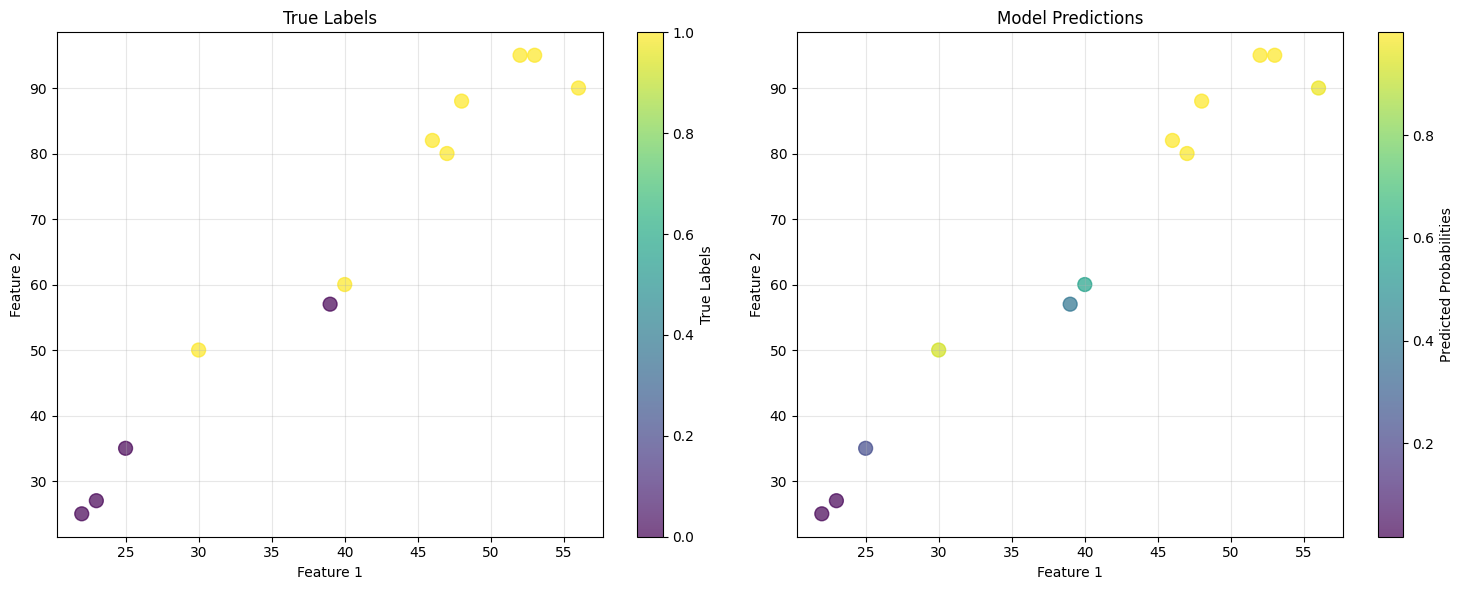

In [7]:
import matplotlib.pyplot as plt

# Convert tensor to numpy
inputs_np = inputs.cpu().detach().numpy()

# Convert labels to numpy for coloring
labels_np = labels.cpu().detach().numpy().flatten()

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(inputs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Input data with true labels
scatter1 = ax1.scatter(inputs_np[:, 0], inputs_np[:, 1], 
                      c=labels_np, cmap='viridis', s=100, alpha=0.7)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('True Labels')
ax1.grid(True, alpha=0.3)

# Plot 2: Input data with predictions
predictions_np = predictions.cpu().detach().numpy().flatten()
scatter2 = ax2.scatter(inputs_np[:, 0], inputs_np[:, 1], 
                      c=predictions_np, cmap='viridis', s=100, alpha=0.7)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Model Predictions')
ax2.grid(True, alpha=0.3)

plt.colorbar(scatter1, ax=ax1, label='True Labels')
plt.colorbar(scatter2, ax=ax2, label='Predicted Probabilities')
plt.tight_layout()
plt.show()